# sklearn 聚类
(K 均聚类, 四种高斯混合 GMM 聚类)

* matplotlib.patches.Ellipse() 创建并绘制椭圆形状的图形对象
* matplotlib.pyplot.quiver() 绘制向量箭头
* numpy.arctan2() 计算反正切，返回弧度值
* numpy.linalg.svd() 完成奇异值分解
* numpy.sqrt() 计算平方根
* sklearn.cluster.KMeans() 执行K 均值聚类算法，将数据点划分成预定数量的簇
* sklearn.mixture.GaussianMixture() 用于拟合高斯混合模型，以对数据进行聚类和概率密度估计

## 聚类

聚类是无监督学习中的一类问题.

聚类的本质是将数据集中的样本按照某种相似性指标进行分组的过程,常用的聚类算法包括 K 均值聚类和高斯混合聚类.

在机器学习中,决定将数据分成多少个簇是一个重要且具有挑战性的问题.通常称之为簇数估计.不同的聚类算法可能需要不同的方法来确定合适的聚类数目.

在使用 sklearn 聚类算法时,会发现有些算法有 predict() 方法.这些算法可以用于对新数据进行预测,即将新数据分配到已有的簇中.有这种功能的聚类算法叫做**归纳聚类**算法.

归纳聚类算法也有决策边界,这就意味着归纳聚类算法模型具有一定的泛化能力,可以推广到新的,之前未见过的数据.

不具备这种能力的聚类算法叫做**非归纳聚类**(non-inductive clustering).

非归纳聚类只能对训练数据进行聚类,而不能将新的数据点添加到已有的模型中进行预测.这意味着模型在训练时只能学习训练数据的模式,无法用于对新数据点进行簇分配.比如,层次聚类,DBSCAN 聚类都是非归纳聚类.

归纳聚类强调的是模型的泛化能力,而非归纳聚类强调的是模型的可解释性,侧重于建模训练数据内部的结构.

## K 均值聚类

又称为 K-means 算法.它将样本分成 K 个簇,使得每个数据点与其所属簇类的中心(也叫做质心)之间的距离最小化.一般情况下,每个簇的中心点是该簇中所有样本点的平均值.

以二聚类为例，展示K 均值聚类的操作流程。从样本数据开始，首先从样本中随机选取2 个数据作为均值向量μ1 和μ2 的初始值，然后进入如下迭代循环。
1. 计算每一个样本点分别到均值向量 μ1 和μ2 的距离；
2. 比较每个样本到 μ1 和μ2 距离，确定簇的划分；
3. 根据当前簇，重新计算并更新均值向量 μ1 和μ2。

根据前文介绍的内容，我们知道K 均值算法为归纳聚类算法; K-means 算法可以用训练好的模型预测其他新样本数据的聚类,从而获得**聚类决策边界**.容易发现 K-means 算法的决策边界是线性的.

/Users/shainvol/anaconda3/envs/myEnv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


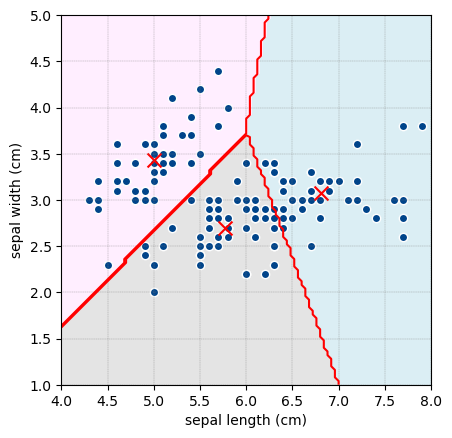

In [4]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# 导入并整理数据
iris = datasets.load_iris()
X = iris.data[:, :2]  # 为便于可视化，仅使用前两个特征

# 生成网格化数据
x1_array = np.linspace(4,8,101)
x2_array = np.linspace(1,5,101)
xx1, xx2 = np.meshgrid(x1_array,x2_array)
# 创建色谱
rgb = [[255, 238, 255],
       [219, 238, 244],
       [228, 228, 228]]
rgb = np.array(rgb)/255.
cmap_light = ListedColormap(rgb)

# 采用 KMeans 聚类
kmeans = KMeans(n_clusters=3)  # 通过 n_clusters 指定聚类数目
cluster_label = kmeans.fit_predict(X)  # fit 仅仅是训练, fit_predict 训练并预测
                                       # fit_predict 将数据集应用于模型进行聚类,并返回每个样本所属的聚类标签

# 预测聚类
Z = kmeans.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

fig, ax = plt.subplots()

ax.contourf(xx1, xx2, Z, cmap=cmap_light)
ax.scatter(x = X[:, 0], y = X[:, 1], 
           color = np.array([0, 68, 138])/255. , 
           alpha=1.0,
           linewidth = 1, edgecolors=[1,1,1])

# 绘制决策边界
levels = np.unique(Z).tolist()
ax.contour(xx1, xx2, Z, levels = levels, colors = 'r')
centroids = kmeans.cluster_centers_  # fit 以后的模型 cluster_centers_ 属性可以返回聚类中心
                                     # 聚类中心是一个数组, 数组的每一行代表一个聚类中心
ax.scatter( centroids[:, 0], centroids[:, 1],
           marker = 'x', s = 100, linewidths=1.5,
           color = 'r')
ax.set_xlim(4, 8)
ax.set_ylim(1, 5)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.grid(linestyle='--', linewidth=0.25,
        color = [0.5, 0.5, 0.5])
ax.set_aspect('equal', adjustable='box')


## 高斯混合

高斯混合模型(GMM)将样本分为多个高斯分布,每个高斯分布对应一个簇.

与 K-means 算法不同,高斯混合模型不仅能够将数据点分配到不同的簇,还可以为每个簇分配一个概率值,表明数据点属于该簇的可能性.

scikit-learn 工具包中sklearn.mixture 高斯混合模型支持四种协方差矩阵——tied (平移)、spherical (球面)、diag (对角)和full (完全)。

* tied (平移)：所有分量共享一个非对角协方差矩阵Σ。每个簇对应的多元高斯分布等高线为大小相等旋转椭圆。tied 对应的决策边界为直线。
* spherical (球面)：每个分量协方差矩阵Σj (j = 1,2, …, K) 不同，但是每个分量Σj 均为对角阵；且 Σj 对角元素相同，即特征方差相同。每个簇对应的多元高斯分布等高线为正圆。spherical 对应的决策边界为圆形弧线。
* diag (对角)：每个分量有各自独立的对角协方差矩阵，也就是Σj 为对角阵，特征条件独立；但是对 Σj 对角线元素大小不做限制。每个簇对应的多元高斯分布等高线正椭圆，diag 对应的决策边界为正圆锥曲线。
* full (完全)：每个分量有各自独立协方差矩阵，即对Σj 不做任何限制。full 对应的决策边界为任意圆锥曲线。

和K 均值聚类算法一样，高斯混合模型GMM也需要指定K 值；高斯混合模型也是利用迭代求解优化问题。不同的是，GMM 利用协方差矩阵，可以估算后验概率/成员值。前文提过，GMM的协方差矩阵有四种类型，每种类型对应不同假设，获得不同决策边界类型。

K 均值聚类可以看作是高斯混合模型一个特例.